In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('../../data/Dry_Bean.csv')
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [5]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

## drop duplicates

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(13543, 17)

## Undersampling

<Axes: xlabel='Class', ylabel='count'>

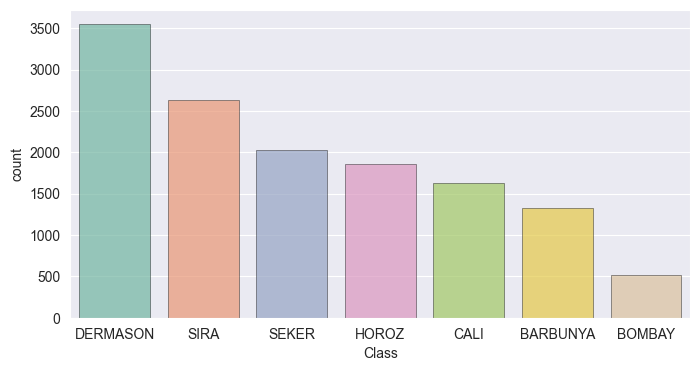

In [7]:
plt.figure(figsize=(8, 4))

sns.countplot(
    data=df,
    x='Class',
    order=df['Class'].value_counts().index,
    palette='Set2',
    alpha=.7,
    edgecolor='black',
    linewidth=.4
)

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
underSample = RandomUnderSampler(random_state=42)

In [10]:
X = df.drop('Class', axis=1)
y = df.Class

In [11]:
X_over, y_over = underSample.fit_resample(X, y)
X_over.shape, y_over.shape

((3654, 16), (3654,))

<Axes: xlabel='Class', ylabel='count'>

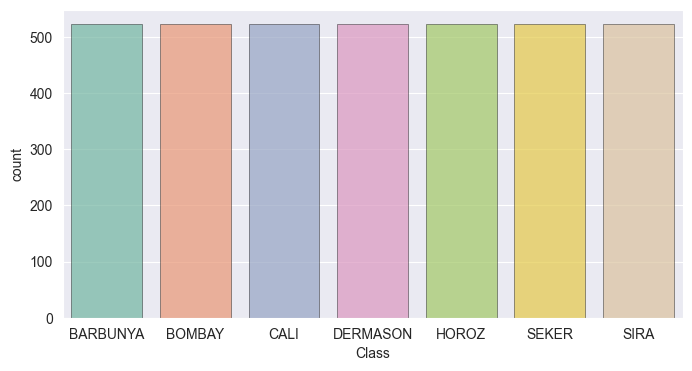

In [12]:
plt.figure(figsize=(8, 4))

sns.countplot(
    x=y_over,
    alpha=.7,
    palette='Set2',
    edgecolor='black',
    linewidth=.4
)

In [13]:
df.shape

(13543, 17)

In [14]:
X_over.shape

(3654, 16)

## Conversion a numerico

In [15]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [16]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [17]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Ananalisis Exploratorio de Datos

### Correlations

In [18]:
df_dea = X_over
df_dea['Class'] = y_over

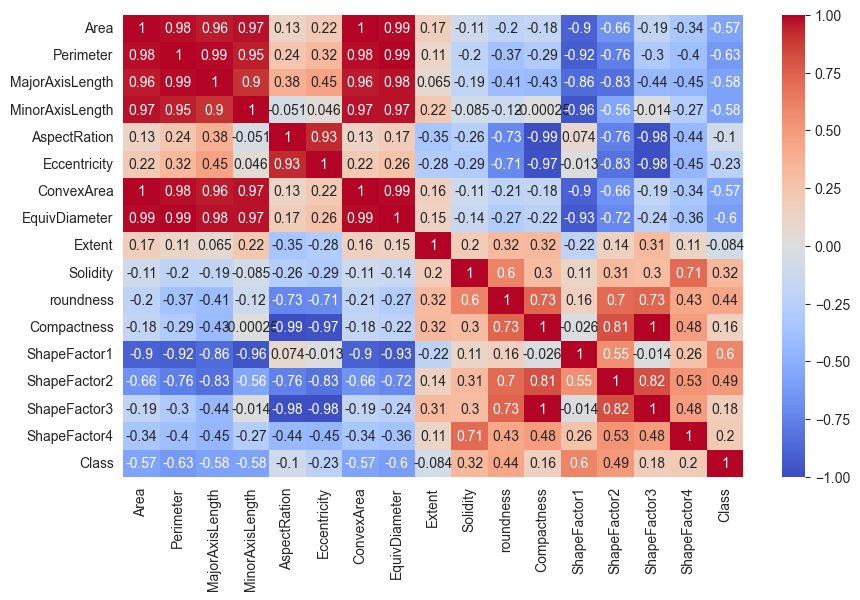

In [22]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    df_dea.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    # linewidths=.5
)

plt.show()

In [23]:
X_over.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

### Visualizacion de datos

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


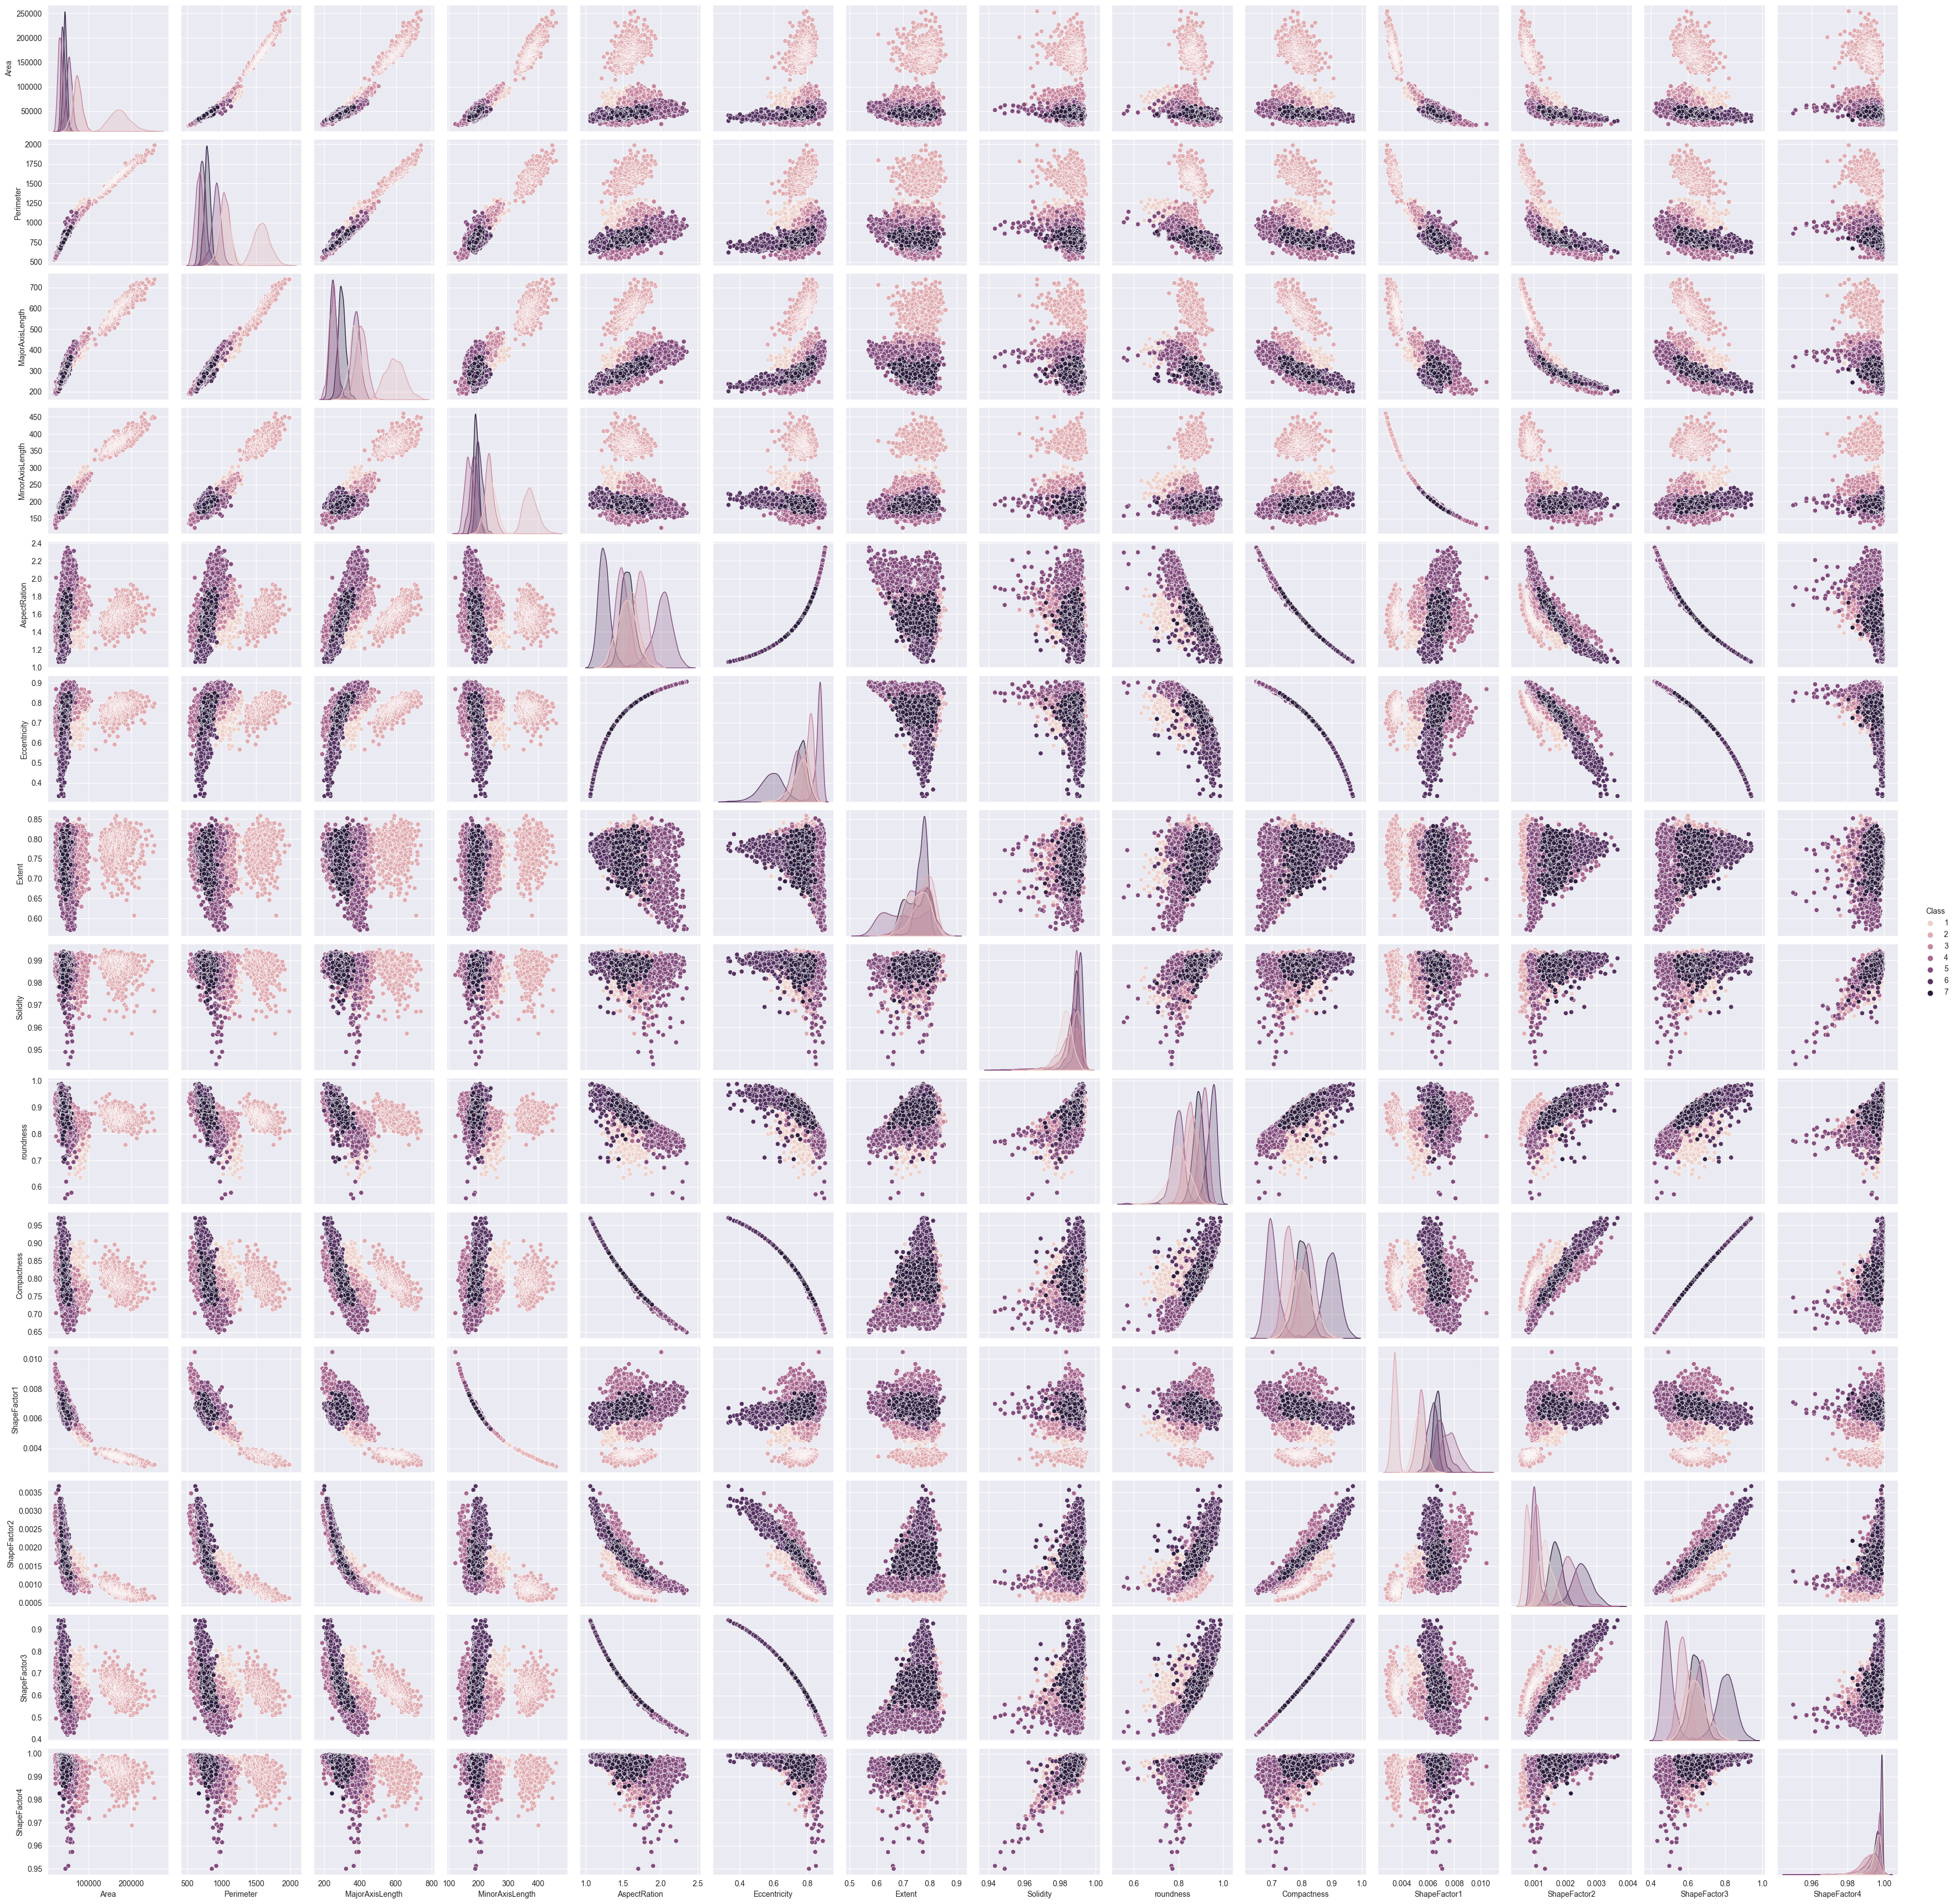

In [24]:
sns.pairplot(
    df_dea,
    hue='Class'
)

plt.show()

## Split y escalamiento de datos

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2923, 15), (731, 15), (2923,), (731,))

In [27]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

## Modelo multiclase

In [31]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [32]:
parameters = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'C': [0.1, 1, 10, 100, 1000]
}

log_reg = LogisticRegression()

clf = GridSearchCV(log_reg, parameters, cv=5, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [33]:
print(f'Mejores hipérparámetros: {clf.best_params_}')
print(f'Exactitud: {clf.best_score_}')

Mejores hipérparámetros: {'C': 1000, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Exactitud: 0.9982888420559654


In [34]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00       110

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



In [35]:
# confusion matrix
confusion_matrix(y_test, predictions)

array([[128,   0,   0,   0,   0,   0,   0],
       [  0,  98,   0,   0,   0,   0,   0],
       [  0,   0, 103,   0,   0,   0,   0],
       [  0,   0,   0, 105,   0,   0,   0],
       [  0,   0,   0,   0,  96,   0,   0],
       [  0,   0,   0,   0,   0,  91,   0],
       [  0,   0,   0,   0,   0,   0, 110]], dtype=int64)

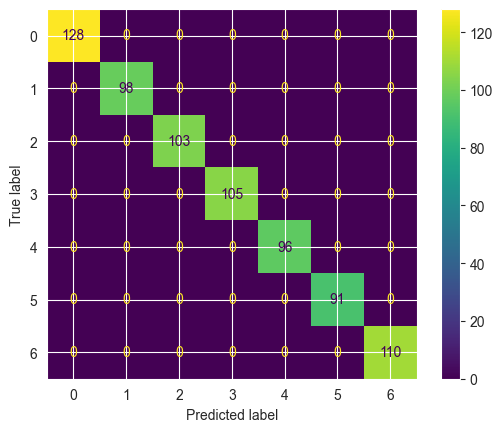

In [36]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=
disp.plot()